In [22]:
# imports for array-handling and plotting
import pandas as pd
import numpy as np
import matplotlib 
matplotlib.use('agg')
import matplotlib.pyplot as plt
#xgboost
from xgboost import XGBClassifier
# Accuracy
from sklearn.metrics import accuracy_score
# keras imports for the dataset 
from keras.datasets import mnist
from keras.utils import np_utils

Now we'll load the dataset using this handy function which splits the MNIST data into train and test sets.

In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Visualize some grayscale images from dataset 

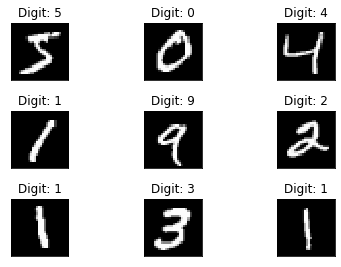

In [13]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [14]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [10]:
X_train.shape, Y_train.shape

((60000, 784), (60000, 10))

**Train the model**

In [16]:

eval_set = [(X_test, y_test)]
model = XGBClassifier()
# - logloss” for binary logarithmic loss and “mlogloss” for multi-class log loss (cross entropy).
model.fit(X_train, y_train, eval_metric="mlogloss", eval_set=eval_set, verbose=True)

[0]	validation_0-mlogloss:1.36772
[1]	validation_0-mlogloss:1.04625
[2]	validation_0-mlogloss:0.83568
[3]	validation_0-mlogloss:0.68749
[4]	validation_0-mlogloss:0.57617
[5]	validation_0-mlogloss:0.49149
[6]	validation_0-mlogloss:0.42596
[7]	validation_0-mlogloss:0.37466
[8]	validation_0-mlogloss:0.33282
[9]	validation_0-mlogloss:0.29905
[10]	validation_0-mlogloss:0.27135
[11]	validation_0-mlogloss:0.24926
[12]	validation_0-mlogloss:0.23075
[13]	validation_0-mlogloss:0.21555
[14]	validation_0-mlogloss:0.20134
[15]	validation_0-mlogloss:0.19012
[16]	validation_0-mlogloss:0.17998
[17]	validation_0-mlogloss:0.17193
[18]	validation_0-mlogloss:0.16420
[19]	validation_0-mlogloss:0.15672
[20]	validation_0-mlogloss:0.15018
[21]	validation_0-mlogloss:0.14518
[22]	validation_0-mlogloss:0.14042
[23]	validation_0-mlogloss:0.13588
[24]	validation_0-mlogloss:0.13178
[25]	validation_0-mlogloss:0.12866
[26]	validation_0-mlogloss:0.12525
[27]	validation_0-mlogloss:0.12137
[28]	validation_0-mlogloss:0.1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

**Evaluate the model**

In [19]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.80%


**Reading the test Data**

In [26]:
test = pd.read_csv('../input/digit-recognizer/test.csv')
test = test / 255.0


**Predict the test dataset**

In [27]:
final_prediction = model.predict(test)

**Create the submit file**

In [31]:
#Creating the file ready with rows and Columns feild
index = test.index.values + 1
data = {'ImageId' : index, "Label" : final_prediction.astype(int).ravel()}
df = pd.DataFrame(data=data)
df.to_csv("submission.csv",index = False)
